# DATASET 2 WITH PCA

In [ ]:
# Random forest:0.972027972027972
# Decision tree: 0.972027972027972
# Naive bayes: 
# KNN: 0.965034965034965
# Logistic regression: 0.8741258741258742
# Gradient boosting: 0.972027972027972
# SVM: 0.9300699300699301

In [1]:
import pandas as pd

In [3]:
# reading first dataset
dataset_2_path = r'C:\Users\dell\Desktop\Priya_ML\diabetes_dataset_2019.csv'
dataset_2 = pd.read_csv(dataset_2_path)
dataset_2.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0.0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0.0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0.0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0.0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0.0,not much,no


In [4]:
dataset_2.shape # dataset has 520 rows and 17 columns

(952, 18)

In [5]:
# finding missing values
dataset_2.isna().sum()
# none of the attributes have missing values

 Age                 0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [6]:
dataset_2.rename(columns={' Age': 'Age', 'Pregancies': 'Pregnancies', 'UriationFreq': 'UrinationFreq'}, inplace=True)

In [7]:
dataset_2.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregnancies', 'Pdiabetes',
       'UrinationFreq', 'Diabetic'],
      dtype='object')

In [8]:
# checking out unique values in Pregnancies columns 
dataset_2['Pregnancies'].unique()

array([ 0.,  1.,  2.,  3.,  4., nan])

In [9]:
# replacing missing values by mode for Pregnancies column
dataset_2['Pregnancies'].fillna(dataset_2['Pregnancies'].mode()[0], inplace=True)

In [10]:
# checking out unique values in BMI columns 
dataset_2['BMI'].unique()

array([39., 28., 24., 23., 27., 21., 20., 26., 22., 15., 34., 30., 29.,
       18., 32., 31., 36., 38., 40., 35., 19., 33., 17., 25., nan, 42.,
       45.])

In [11]:
# replacing missing values by mean for BMI column
dataset_2['BMI'].fillna(round(dataset_2['BMI'].mean(),2), inplace=True)

In [12]:
# checking out unique values in Pdiabetes columns 
dataset_2['Pdiabetes'].unique()

array([ 0.,  1., nan])

In [13]:
# replacing missing values by mode for Pdiabetes column
dataset_2['Pdiabetes'].fillna(dataset_2['Pdiabetes'].mode()[0], inplace=True)

In [14]:
# checking out unique values in Diabetic columns 
dataset_2['Diabetic'].unique()
# we have a invalid ' no' which should be replaced by 'no'

array(['no', 'yes', ' no', nan], dtype=object)

In [15]:
# the invalid ' no' is present at 17th row
dataset_2.loc[17, 'Diabetic'] = 'no'

In [16]:
dataset_2['Diabetic'].unique()

array(['no', 'yes', nan], dtype=object)

In [17]:
# replacing missing values by mode for Pdiabetes column
dataset_2['Diabetic'].fillna(dataset_2['Diabetic'].mode()[0], inplace=True)

In [18]:
# all the missing values have been successfully handled
dataset_2.isna().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregnancies         0
Pdiabetes           0
UrinationFreq       0
Diabetic            0
dtype: int64

In [19]:
# exracting only categorical variables from our dataset
categorical_variables = dataset_2.columns[dataset_2.dtypes == 'object']

In [20]:
# label encoding all the categorical variables to numerical
from sklearn import preprocessing
for cat_var in categorical_variables:
    label_encoder = preprocessing.LabelEncoder()
    #dataste_1[cat_var]= dataset_1['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    dataset_2[cat_var]= label_encoder.fit_transform(dataset_2[cat_var])

In [21]:
dataset_2.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
0,2,1,0,1,3,39.0,0,0,8,6,0,1,2,2,0.0,0.0,0,0
1,2,1,0,1,0,28.0,0,0,8,6,2,3,2,4,0.0,0.0,0,0
2,1,1,0,0,3,24.0,0,0,6,6,0,1,2,4,0.0,0.0,0,0
3,2,1,0,0,3,23.0,0,0,8,6,0,1,2,4,0.0,0.0,0,0
4,1,1,0,0,0,27.0,0,0,8,8,0,1,2,4,0.0,0.0,0,0


In [22]:
# finding correaltion among variables
correaltion_matrix = dataset_2.corr()

In [23]:
correaltion_matrix

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
Age,1.000000,-0.000477,0.078078,0.414213,-0.052470,0.142842,-0.184565,0.014791,-0.156752,-0.032521,0.512592,-0.129006,-0.060538,-0.457172,0.204841,0.009477,0.136783,0.571855
Gender,-0.000477,1.000000,-0.097399,0.025689,0.011142,-0.119535,0.286483,0.316688,-0.065568,0.018978,-0.128469,-0.043500,0.005742,-0.023464,-0.478852,-0.134663,-0.184949,-0.038665
Family_Diabetes,0.078078,-0.097399,1.000000,0.065387,0.054883,0.114671,-0.023238,0.028497,0.049400,0.057418,0.182793,0.076016,-0.045072,-0.113251,0.104031,0.023124,0.030471,0.258472
highBP,0.414213,0.025689,0.065387,1.000000,-0.078333,0.147264,-0.014478,0.110515,-0.070606,-0.133374,0.450301,-0.041014,-0.098576,-0.656714,0.054338,0.033678,0.123374,0.374611
PhysicallyActive,-0.052470,0.011142,0.054883,-0.078333,1.000000,-0.180306,-0.025738,-0.019006,0.079548,0.153894,-0.072020,0.034353,-0.118600,0.094843,0.100753,-0.054769,-0.211367,0.078241
BMI,0.142842,-0.119535,0.114671,0.147264,-0.180306,1.000000,-0.008900,-0.009051,-0.067770,-0.297668,0.182091,-0.009518,0.018109,-0.149418,-0.061899,0.104146,0.256251,0.124520
Smoking,-0.184565,0.286483,-0.023238,-0.014478,-0.025738,-0.008900,1.000000,0.513589,-0.017061,-0.002747,-0.042805,0.022842,-0.013081,-0.015453,-0.133394,-0.016186,-0.033690,-0.008684
Alcohol,0.014791,0.316688,0.028497,0.110515,-0.019006,-0.009051,0.513589,1.000000,-0.004771,0.068522,0.066488,0.028379,-0.019811,-0.131245,-0.184821,-0.061405,-0.103061,0.066235
Sleep,-0.156752,-0.065568,0.049400,-0.070606,0.079548,-0.067770,-0.017061,-0.004771,1.000000,0.534686,-0.101131,0.016214,-0.019765,0.102101,0.042325,0.080274,-0.096103,-0.065470
SoundSleep,-0.032521,0.018978,0.057418,-0.133374,0.153894,-0.297668,-0.002747,0.068522,0.534686,1.000000,-0.114769,0.049491,-0.004589,0.120446,0.157518,0.033035,-0.283036,0.001403


<AxesSubplot:>

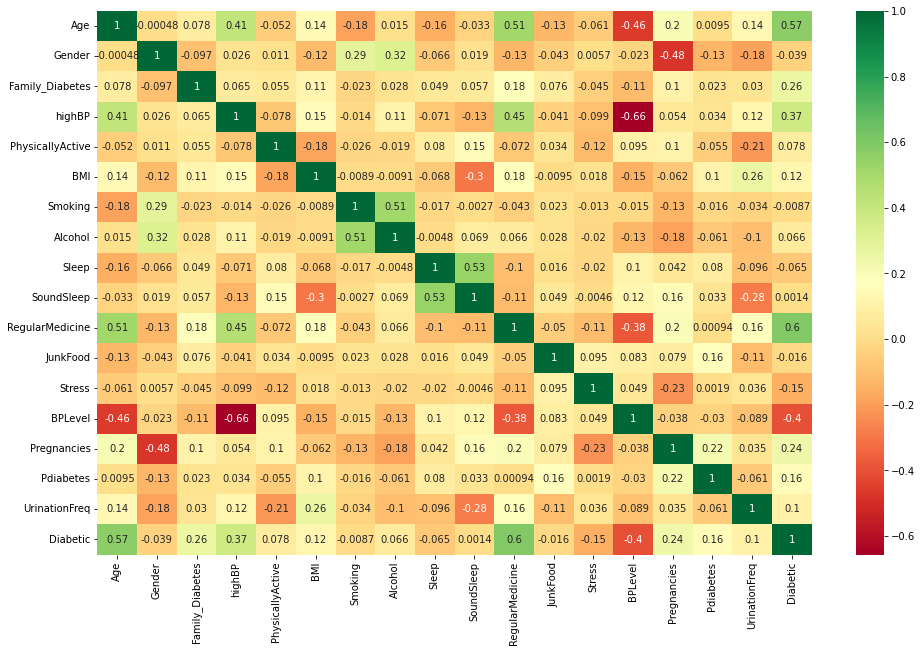

In [24]:
# plotting the correlation matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,10))
sns.heatmap(correaltion_matrix, cmap="RdYlGn", annot=True)

In [25]:
# separating the target class from the dataset
x = dataset_2.drop('Diabetic', axis = 1)
y = dataset_2['Diabetic']

In [26]:
# splitting data into training and testing se
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state=0)

In [27]:
# scaling x_train and x_test
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

In [28]:
# applying PCA
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 7)
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
 
#explained_variance = pca.explained_variance_ratio_

# Random Forest With PCA

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 14, max_depth = 15, criterion = 'gini') # , min_samples_split = 5 n_estimators = 15, , max_depth = 12
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=14)

In [34]:
# accuracy for random forest 
accuracy_rf = rf.score(x_test, y_test)
accuracy_rf

0.972027972027972

In [35]:
# makking predictions using random forest
y_pred_rf = rf.predict(x_test)

([<matplotlib.axis.YTick at 0x2c13080d68>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

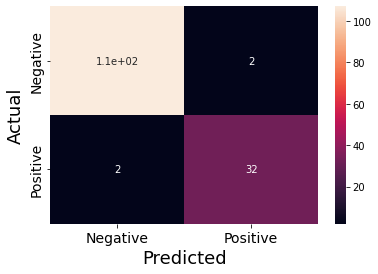

In [36]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [37]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_rf = precision_score(y_test, y_pred_rf)
y_pred_prob_rf = rf.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

In [38]:
print('Random Forest performance evalation measures: ')
print('Accuracy: ', round(accuracy_rf, 4))
print('F1 score: ', round(f1_score_rf, 4))
print('Precision: ', round(precision_rf, 4))
print('Recall: ', round(recall_rf, 4))
print('AUC: ', round(auc_rf, 4))

Random Forest performance evalation measures: 
Accuracy:  0.972
F1 score:  0.9412
Precision:  0.9412
Recall:  0.9412
AUC:  0.9769


In [39]:
true_positive_rf = conf_matrix[1,1]
true_negative_rf = conf_matrix[0,0]
false_positive_rf = conf_matrix[0,1]
false_negative_rf = conf_matrix[1,0]
#print(true_positive_rf)
#print(true_negative_rf)
#print(false_positive_rf)
#print(false_negative_rf)

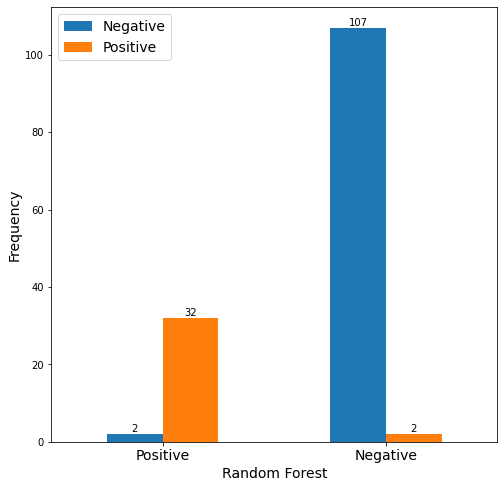

In [40]:
plot_groups = [[false_negative_rf, true_positive_rf], [true_negative_rf, false_positive_rf]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Random Forest', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Decision Tree with PCA

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() # max_depth = 5 
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
# accuracy for decision tree 
accuracy_dt = dt.score(x_test, y_test)
accuracy_dt

0.972027972027972

In [43]:
# making predictions using decision tree
y_pred_dt = dt.predict(x_test)

([<matplotlib.axis.YTick at 0x2c13237a20>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

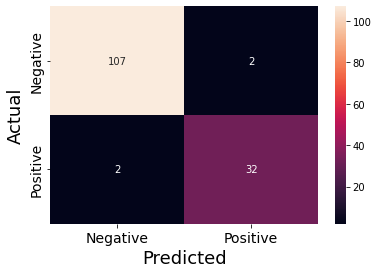

In [44]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix, annot = True, fmt='g')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [45]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_dt = precision_score(y_test, y_pred_dt)
y_pred_prob_dt = rf.predict_proba(x_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
auc_dt = auc(fpr_dt, tpr_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)

In [46]:
print('Decision Tree performance evalation measures: ')
print('Accuracy: ', round(accuracy_dt, 4))
print('F1 score: ', round(f1_score_dt, 4))
print('Precision: ', round(precision_dt, 4))
print('Recall: ', round(recall_dt, 4))
print('AUC: ', round(auc_dt, 4))

Decision Tree performance evalation measures: 
Accuracy:  0.972
F1 score:  0.9412
Precision:  0.9412
Recall:  0.9412
AUC:  0.9769


In [47]:
true_positive_dt = conf_matrix[1,1]
true_negative_dt = conf_matrix[0,0]
false_positive_dt = conf_matrix[0,1]
false_negative_dt = conf_matrix[1,0]

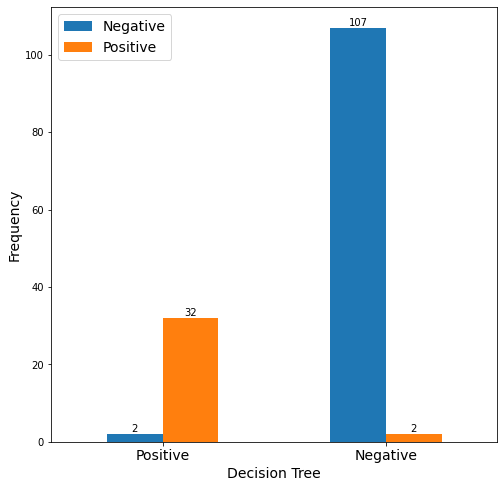

In [48]:
plot_groups = [[false_negative_dt, true_positive_dt], [true_negative_dt, false_positive_dt]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Decision Tree', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Naive Bayes with PCA

In [46]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [246]:
accuracy_nb = nb.score(x_test, y_test)
accuracy_nb

0.8881118881118881

In [247]:
# making predictions using naive bayes
y_pred_nb = nb.predict(x_test)

([<matplotlib.axis.YTick at 0xa5764c5dd8>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

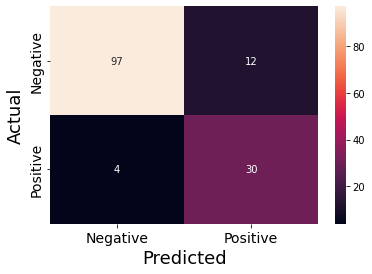

In [249]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix, annot = True, fmt='g')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [250]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_nb = precision_score(y_test, y_pred_nb)
y_pred_prob_nb = nb.predict_proba(x_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
auc_nb = auc(fpr_nb, tpr_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_score_nb = f1_score(y_test, y_pred_nb)

In [251]:
print('Naive Bayes performance evalation measures: ')
print('Accuracy: ', round(accuracy_nb, 4))
print('F1 score: ', round(f1_score_nb, 4))
print('Precision: ', round(precision_nb, 4))
print('Recall: ', round(recall_nb, 4))
print('AUC: ', round(auc_nb, 4))

Naive Bayes performance evalation measures: 
Accuracy:  0.8881
F1 score:  0.7895
Precision:  0.7143
Recall:  0.8824
AUC:  0.9458


In [252]:
true_positive_nb = conf_matrix[1,1]
true_negative_nb = conf_matrix[0,0]
false_positive_nb = conf_matrix[0,1]
false_negative_nb = conf_matrix[1,0]

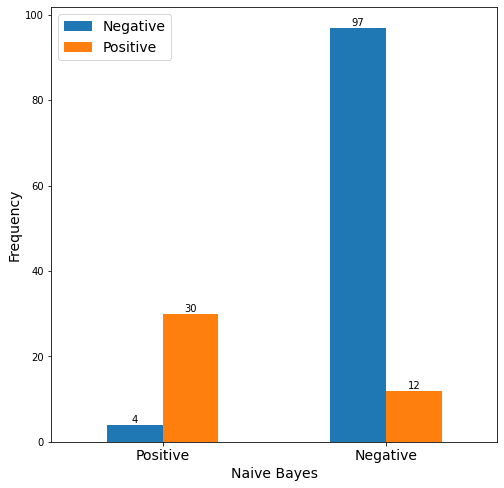

In [253]:
plot_groups = [[false_negative_nb, true_positive_nb], [true_negative_nb, false_positive_nb]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Naive Bayes', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# KNN with PCA

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='distance')

In [50]:
accuracy_knn = knn.score(x_test, y_test)
accuracy_knn

0.965034965034965

In [51]:
# making predictions using knn
y_pred_knn = knn.predict(x_test)

([<matplotlib.axis.YTick at 0x2c1335ef98>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

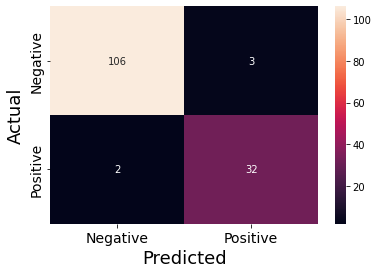

In [52]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix, annot = True, fmt='g')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [53]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_knn = precision_score(y_test, y_pred_knn)
y_pred_prob_knn = knn.predict_proba(x_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

In [54]:
print('KNN performance evalation measures: ')
print('Accuracy: ', round(accuracy_knn, 4))
print('F1 score: ', round(f1_score_knn, 4))
print('Precision: ', round(precision_knn, 4))
print('Recall: ', round(recall_knn, 4))
print('AUC: ', round(auc_knn, 4))

KNN performance evalation measures: 
Accuracy:  0.965
F1 score:  0.9275
Precision:  0.9143
Recall:  0.9412
AUC:  0.9568


In [55]:
true_positive_knn = conf_matrix[1,1]
true_negative_knn = conf_matrix[0,0]
false_positive_knn = conf_matrix[0,1]
false_negative_knn = conf_matrix[1,0]

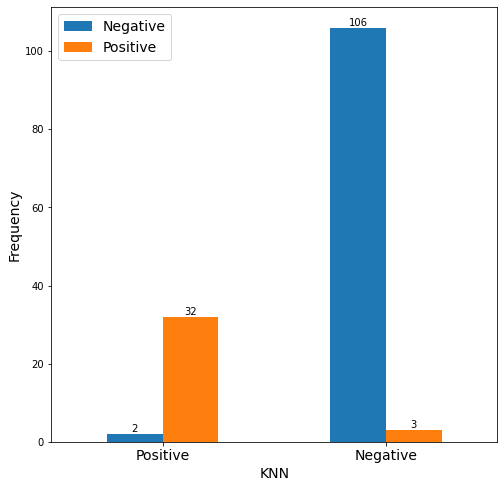

In [56]:
plot_groups = [[false_negative_knn, true_positive_knn], [true_negative_knn, false_positive_knn]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('KNN', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Logistic Regression with PCA

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=243)
log_reg.fit(x_train, y_train)
# max_iter

LogisticRegression(max_iter=243)

In [58]:
accuracy_log_reg = log_reg.score(x_test, y_test)
accuracy_log_reg

0.8741258741258742

In [59]:
# making predictions using logistic regression
y_pred_log_reg = log_reg.predict(x_test)

([<matplotlib.axis.YTick at 0x2c145b26d8>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

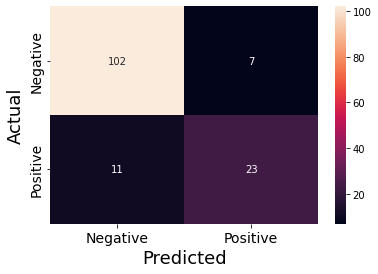

In [60]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot = True, fmt='g')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [61]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_log_reg = precision_score(y_test, y_pred_log_reg)
y_pred_prob_log_reg = log_reg.predict_proba(x_test)[:,1]
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_prob_log_reg)
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_score_log_reg = f1_score(y_test, y_pred_log_reg)

In [62]:
print('Logistic Regression performance evalation measures: ')
print('Accuracy: ', round(accuracy_log_reg, 4))
print('F1 score: ', round(f1_score_log_reg, 4))
print('Precision: ', round(precision_log_reg, 4))
print('Recall: ', round(recall_log_reg, 4))
print('AUC: ', round(auc_log_reg, 4))

Logistic Regression performance evalation measures: 
Accuracy:  0.8741
F1 score:  0.7188
Precision:  0.7667
Recall:  0.6765
AUC:  0.9242


In [63]:
true_positive_log_reg = conf_matrix[1,1]
true_negative_log_reg = conf_matrix[0,0]
false_positive_log_reg = conf_matrix[0,1]
false_negative_log_reg = conf_matrix[1,0]

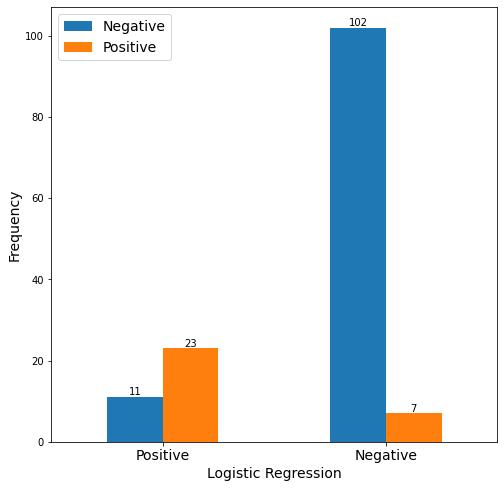

In [64]:
plot_groups = [[false_negative_log_reg, true_positive_log_reg], [true_negative_log_reg, false_positive_log_reg]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Logistic Regression', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Gradient Boosting with PCA

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [66]:
accuracy_gbc = gbc.score(x_test, y_test)
accuracy_gbc

0.972027972027972

In [67]:
# making predictions using gradient boosting
y_pred_gbc = gbc.predict(x_test)

([<matplotlib.axis.YTick at 0x2c1455fd68>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

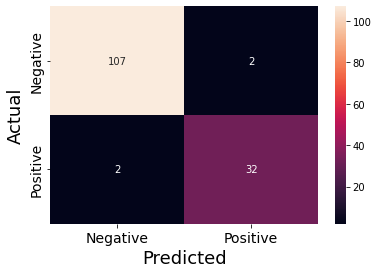

In [68]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(conf_matrix, annot = True, fmt='g')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [69]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_gbc = precision_score(y_test, y_pred_gbc)
y_pred_prob_gbc = gbc.predict_proba(x_test)[:,1]
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, y_pred_prob_gbc)
auc_gbc = auc(fpr_gbc, tpr_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_score_gbc = f1_score(y_test, y_pred_gbc)

In [70]:
print('Gradient Boosting performance evalation measures: ')
print('Accuracy: ', round(accuracy_gbc, 4))
print('F1 score: ', round(f1_score_gbc, 4))
print('Precision: ', round(precision_gbc, 4))
print('Recall: ', round(recall_gbc, 4))
print('AUC: ', round(auc_gbc, 4))

Gradient Boosting performance evalation measures: 
Accuracy:  0.972
F1 score:  0.9412
Precision:  0.9412
Recall:  0.9412
AUC:  0.9927


In [71]:
true_positive_gbc = conf_matrix[1,1]
true_negative_gbc = conf_matrix[0,0]
false_positive_gbc = conf_matrix[0,1]
false_negative_gbc = conf_matrix[1,0]

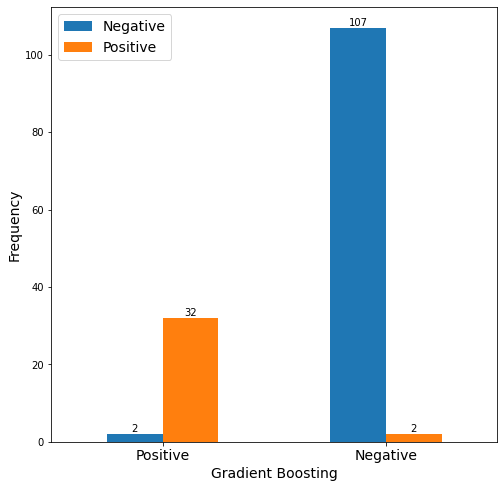

In [72]:
plot_groups = [[false_negative_gbc, true_positive_gbc], [true_negative_gbc, false_positive_gbc]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Gradient Boosting', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# SVM with PCA

In [73]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', coef0=1.1, tol=0.001, gamma=0.05)
svm.fit(x_train, y_train)

SVC(coef0=1.1, gamma=0.05, kernel='poly')

In [74]:
accuracy_svm = svm.score(x_test, y_test)
accuracy_svm

0.9300699300699301

In [75]:
# making predictions using SVM
y_pred_svm = svm.predict(x_test)

([<matplotlib.axis.YTick at 0x2c05d24c18>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

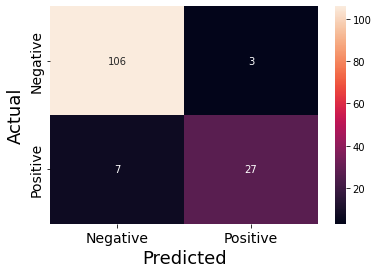

In [76]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot = True, fmt='g')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [77]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_svm = precision_score(y_test, y_pred_svm)
y_pred_prob_svm = gbc.predict_proba(x_test)[:,1]
fpr_svm, tpr_svm, thresholds_gbc = roc_curve(y_test, y_pred_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)

In [78]:
print('SVM performance evalation measures: ')
print('Accuracy: ', round(accuracy_svm, 4))
print('F1 score: ', round(f1_score_svm, 4))
print('Precision: ', round(precision_svm, 4))
print('Recall: ', round(recall_svm, 4))
print('AUC: ', round(auc_svm, 4))

SVM performance evalation measures: 
Accuracy:  0.9301
F1 score:  0.8438
Precision:  0.9
Recall:  0.7941
AUC:  0.9927


In [79]:
true_positive_svm = conf_matrix[1,1]
true_negative_svm = conf_matrix[0,0]
false_positive_svm = conf_matrix[0,1]
false_negative_svm = conf_matrix[1,0]

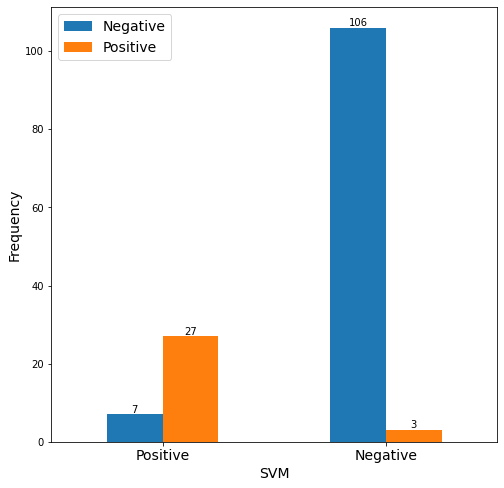

In [80]:
plot_groups = [[false_negative_svm, true_positive_svm], [true_negative_svm, false_positive_svm]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('SVM', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

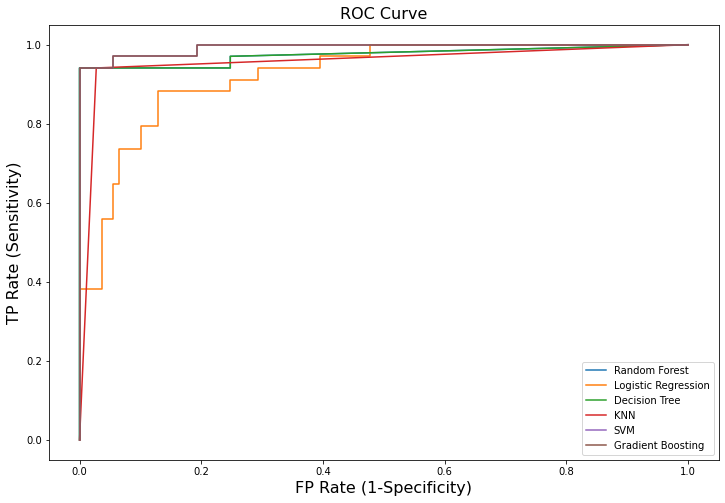

In [98]:
# Plotting ROC curve
plt.figure(figsize = (12,8))
plt.plot(fpr_rf,tpr_rf,label="Random Forest")
plt.plot(fpr_log_reg,tpr_log_reg,label="Logistic Regression")
plt.plot(fpr_dt,tpr_dt,label="Decision Tree")
plt.plot(fpr_knn,tpr_knn,label="KNN")
plt.plot(fpr_svm,tpr_svm,label="SVM")
plt.plot(fpr_gbc,tpr_gbc,label="Gradient Boosting")
#plt.plot(fpr_nb,tpr_nb,label="Naive Bayes")
plt.xlabel('FP Rate (1-Specificity)', fontsize=16)
plt.ylabel('TP Rate (Sensitivity)', fontsize=16)
plt.title('ROC Curve', fontsize=16)
plt.legend()

[Text(0, 0, '0.972'),
 Text(0, 0, '0.972'),
 Text(0, 0, '0.965'),
 Text(0, 0, '0.874'),
 Text(0, 0, '0.972'),
 Text(0, 0, '0.93')]

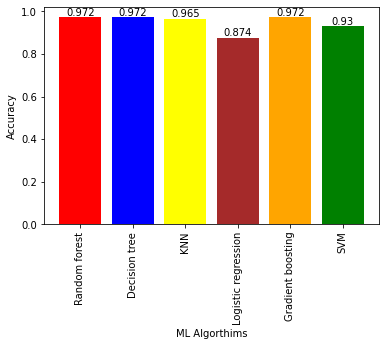

In [83]:
# plotting all the accuracy of algorithm in a bar plot 
import numpy as np
x_index = np.arange(6)
y = [round(accuracy_rf,3), round(accuracy_dt,3), round(accuracy_knn,3), round(accuracy_log_reg,3), 
     round(accuracy_gbc,3), round(accuracy_svm,3)]
algo = ['Random forest', 'Decision tree', 'KNN', 'Logistic regression', 'Gradient boosting', 'SVM']
fig, ax = plt.subplots()
ax.set_xticks(x_index, labels = algo, rotation = 90)
bars = ax.bar(x_index, y, color=['red', 'blue', 'yellow', 'brown', 'orange', 'green', 'pink'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('ML Algorthims')
ax.bar_label(bars)